In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_neurips_matplotib_rcparams()

In [59]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])

In [60]:
EXP_DIR = "../output/dimRegime-5-all"
all_output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR)
all_output_df['Id'] = all_output_df.apply(build_Id, axis=1)
cols = [col for col in all_output_df.columns if not col.startswith('mle')]
all_output_df = all_output_df.loc[:, cols]

Process file: ../output/dimRegime-5-all/1590697291-g02-d50-n500000/output-01.json...


In [142]:
EXP_DIR_MLE = "../output/dimRegime-5"
mle_output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR_MLE)
mle_output_df['Id'] = mle_output_df.apply(build_Id, axis=1)
mle_cols = [col for col in mle_output_df.columns if col.startswith('mle')] + ['Id']
mle_output_df = mle_output_df.loc[:, mle_cols]

Process file: ../output/dimRegime-5/1590697282-g04-d25-n250000/output-01.json...


In [143]:
output_df = pd.merge(all_output_df, mle_output_df, on='Id')

---

In [146]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    
    'bbvi': 'bbvi_adj_mean', 
    #'bbvi': 'bbvi_adj_mode',
    
    'vi': 'vi_adj_mean',
    #'vi': 'vi_adj_mode',
    
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_mle                                      acc_bbvi                                    ... fn_vi                               fn_gb                               
          min       max      mean       std count       min     max      mean       std count  ...   min max      mean       std count   min max       mean       std count
dim                                                                                            ...                                                                         
5    0.800000  1.000000  0.914000  0.063941    20  0.960000  1.0000  0.998000  0.008944    20  ...     0   0  0.000000  0.000000    20     0   2   0.900000  0.718185    20
10   0.800000  0.980000  0.856000  0.047061    20  0.980000  1.0000  0.997500  0.005501    20  ...     0   1  0.100000  0.307794    20     2  11   6.550000  2.372540    20
15   0.777778  0.915556  0.884222  0.029813    20  0.982222  1.0000  0.993111  0.005853    20  ...     0   1  0.200000  0.410391    20     9  22  16.200000  3.791958    20
20   0.845000  0.990000  0.935125  0.044813    20  0.977500  0.9975  0.991250  0.005821    20  ...     0   2  0.650000  0.670820    20    23  43  32.650000  5.382965    20
25   0.924800  0.982400  0.957689  0.018967     9  0.984000  0.9984  0.991111  0.005719     9  ...     0   5  1.555556  1.943651     9    31  60  47.666667  8.888194     9

[5 rows x 280 columns]

In [147]:
plot_df[[col for col in plot_df.columns if col[0].startswith('relerr')]]

relerr_mle                                     relerr_bbvi                                     relerr_vi                                     relerr_gb                                    
           min       max      mean       std count         min       max      mean       std count       min       max      mean       std count       min       max      mean       std count
dim                                                                                                                                                                                           
5     0.099933  4.279185  1.096847  1.511921    20    0.082651  0.200076  0.139450  0.028659    20  0.050295  0.147397  0.095656  0.021123    20  0.735912  0.886374  0.818815  0.040740    20
10    0.155851  2.456378  0.767040  0.668856    20    0.089661  0.147232  0.113700  0.018453    20  0.069608  0.119769  0.090210  0.013133    20  0.358512  0.582235  0.454852  0.061148    20
15    0.248402  2.072194  0.480503  0.487529    20    0.071954  0.124404  0.108343  0.014891    20  0.064671  0.099576  0.088492  0.011280    20  0.303328  0.377792  0.346801  0.023505    20
20    0.122873  0.874479  0.273448  0.183737    20    0.076283  0.120010  0.100443  0.011884    20  0.072540  0.110159  0.089465  0.011574    20  0.268710  0.334100  0.294142  0.015620    20
25    0.125603  0.321784  0.183595  0.064811     9    0.074004  0.105646  0.091617  0.011125     9  0.074170  0.101660  0.089988  0.009920     9  0.220265  0.265307  0.244643  0.012734     9

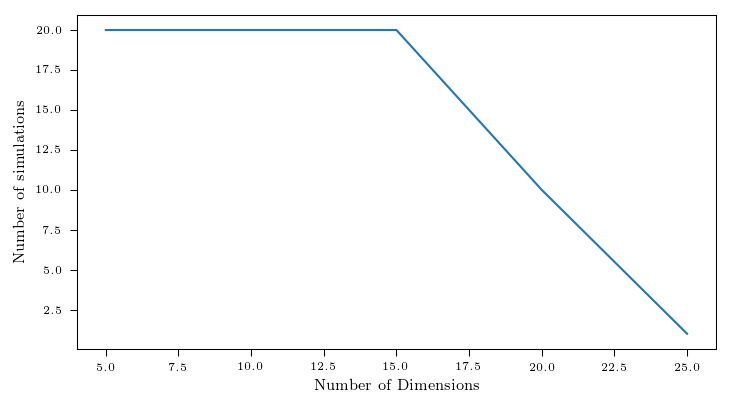

In [132]:
plt.figure()
plt.plot(plot_df.index, plot_df['acc_mle']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

In [133]:
NEURIPS_RCPARAMS = {
    "figure.autolayout": False,         # Makes sure nothing the feature is neat & tight.
    "figure.figsize": (5.5, 2.95),      # Text width: 5.5in (double figure minus spacing 0.2in).
    "figure.dpi": 150,                  # Displays figures nicely in notebooks.
    "axes.linewidth": 0.5,              # Matplotlib's current default is 0.8.
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",             # use serif rather than sans-serif
    "font.serif": "Times New Roman",    # use "Times New Roman" as the standard font
    "font.size": 7,
    "axes.titlesize": 7,                # LaTeX default is 10pt font.
    "axes.labelsize": 7,                # LaTeX default is 10pt font.
    "legend.fontsize": 6,               # Make the legend/label fonts a little smaller
    "legend.frameon": True,             # Remove the black frame around the legend
    "patch.linewidth": 0.5,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "lines.linewidth": 1.0,
    "lines.markersize": 4,
    "grid.linewidth": 0.3,
    "pgf.texsystem": "xelatex",         # use Xelatex which is TTF font aware
    "pgf.rcfonts": False,               # Use pgf.preamble, ignore standard Matplotlib RC
    "pgf.preamble": [
        r'\usepackage{fontspec}',
        r'\usepackage{unicode-math}',
        r'\setmainfont{Times New Roman}',
    ],
    'errorbar.capsize': 3.0,
}
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update(NEURIPS_RCPARAMS)

f1score
relerr


RuntimeError: The command
    ['xelatex', '-interaction=nonstopmode', '-halt-on-error', 'figure.tex']
failed and generated the following output:
This is XeTeX, Version 3.14159265-2.6-0.99992 (TeX Live 2015) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./figure.tex
LaTeX2e <2015/01/01>
Babel <3.9l> and hyphenation patterns for 79 languages loaded.
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/minimal.cls
Document Class: minimal 2001/05/25 Standard LaTeX minimal class
) (/usr/local/texlive/2015/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/local/texlive/2015/texmf-dist/tex/latex/fontspec/fontspec.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/l3kernel/expl3-code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/latex/l3kernel/l3unicode-data.def)
(/usr/local/texlive/2015/texmf-dist/tex/latex/l3kernel/l3xdvipdfmx.def))
(/usr/local/texlive/2015/texmf-dist/tex/latex/l3packages/xparse/xparse.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/fontspec/fontspec-patches.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/fontspec/fontspec-xetex.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/fontenc.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/euenc/eu1enc.def)
(/usr/local/texlive/2015/texmf-dist/tex/latex/euenc/eu1lmr.fd))
(/usr/local/texlive/2015/texmf-dist/tex/xelatex/xunicode/xunicode.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/tipa/t3enc.def
(/usr/local/texlive/2015/texmf-dist/tex/latex/euenc/eu1lmss.fd))
(/usr/local/texlive/2015/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/latexconfig/graphics.cfg)
(/usr/local/texlive/2015/texmf-dist/tex/xelatex/xetex-def/xetex.def))))
(/usr/local/texlive/2015/texmf-dist/tex/latex/fontspec/fontspec.cfg)))
(/usr/local/texlive/2015/texmf-dist/tex/latex/unicode-math/unicode-math.sty
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/ifluatex.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/l3packages/l3keys2e/l3keys2e.sty)
 (/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/catchfile.sty
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/infwarerr.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/ltxcmds.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/etexcmds.sty))
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/fix-cm.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2015/texmf-dist/tex/latex/filehook/filehook.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/unicode-math/unicode-math-xetex.s
ty
(/usr/local/texlive/2015/texmf-dist/tex/latex/unicode-math/unicode-math-table.t
ex))) (/usr/local/texlive/2015/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/utilities/pgfutil-common.te
x
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/utilities/pgfutil-common-li
sts.tex))
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/utilities/pgfutil-latex.def
(/usr/local/texlive/2015/texmf-dist/tex/latex/ms/everyshi.sty))
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/utilities/pgfrcs.code.tex))
(/usr/local/texlive/2015/texmf-dist/tex/latex/pgf/basiclayer/pgfcore.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/pgf/systemlayer/pgfsys.sty
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/systemlayer/pgfsys.code.tex
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/utilities/pgfkeys.code.tex
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/utilities/pgfkeysfiltered.c
ode.tex))
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/systemlayer/pgf.cfg)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-xetex.de
f
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-dvipdfmx
.def
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-common-p
df.def))))
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/systemlayer/pgfsyssoftpath.
code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/systemlayer/pgfsysprotocol.
code.tex)) (/usr/local/texlive/2015/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/latexconfig/color.cfg))
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcore.code.tex
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmath.code.tex
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathcalc.code.tex
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathutil.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathparser.code.tex
)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.code.
tex
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.basic
.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.trigo
nometric.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.rando
m.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.compa
rison.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.base.
code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.round
.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.misc.
code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.integ
erarithmetics.code.tex)))
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/math/pgfmathfloat.code.tex)
)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepoints.co
de.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathconst
ruct.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathusage
.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorescopes.co
de.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcoregraphicst
ate.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretransform
ations.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorequick.cod
e.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreobjects.c
ode.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathproce
ssing.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorearrows.co
de.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreshade.cod
e.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreimage.cod
e.tex
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreexternal.
code.tex))
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorelayers.co
de.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretranspare
ncy.code.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepatterns.
code.tex)))
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/modules/pgfmoduleshapes.cod
e.tex)
(/usr/local/texlive/2015/texmf-dist/tex/generic/pgf/modules/pgfmoduleplot.code.
tex)
(/usr/local/texlive/2015/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version
-0-65.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version
-1-18.sty))
No file figure.aux.
(/usr/local/texlive/2015/texmf-dist/tex/latex/tipa/t3cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: xetex
ABD: EveryShipout initializing macros (./figure.pgf
! Dimension too large.
<to be read again> 
                   \relax 
l.1379 ...ransformshift{0.479864in}{-565.745188in}
                                                  %
No pages of output.
Transcript written on figure.log.

and the following error:


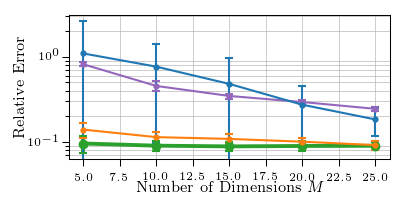

In [148]:
plot_meta_data = [
    ('f1score',  'F1-Score',         ), 
    ('relerr',   'Relative Error',   ),
    ('runtime_log',  'Runtime (in min)', ),
#    ('runtime_lin',  'Runtime (in min)', ),
    
#    ('num_iter', 'Number of iterations'),
    
#    ('precAt5', 'Precision@5',     ),
    ('precAt10', 'Precision@10',     ),
#    ('precAt20', 'Precision@20',     ),
#    ('precAt50', 'Precision@50',     ),
#    ('precAt100', 'Precision@100',     ),
#    ('precAt200', 'Precision@200',     ),
]

#   (prefix, label,  color,  ls,   lw)
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]

for i, (prefix, ylabel) in enumerate(plot_meta_data):
    print(prefix)
    
    plt.figure(figsize=(5.5/2 - 0.2, 1.25))
    plt.grid()
    
    if prefix == 'runtime_log':
        #ax = plt.gca()
        #new_ax = plt.twinx()
        #plt.sca(new_ax)
        #plt.grid(False)
        pass
    
    for suf, label, color, ls, lw in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                     marker='o', markersize=2*lw)
    
    if prefix == 'runtime_log':
        #plt.yticks([], [])
        #plt.sca(ax)
        pass
    
    plt.xlabel(f'Number of Dimensions $M$', labelpad=0)
    plt.ylabel(ylabel, labelpad=3);
    
    if prefix == 'f1score':
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.legend(loc='lower left', prop={'size': 7})
        plt.ylim(bottom=0.6)
    
    if prefix == 'relerr':
        plt.grid(which='both', axis='y')
        plt.gca().tick_params(axis='y', which='major', pad=0.5)
        plt.ylabel(ylabel, labelpad=0);
        plt.yscale('log', basey=10, nonposy='clip')
        #plt.ylim(bottom=1e-3)
        pass
        
    if prefix == 'runtime_log':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        plt.grid(which='both', axis='y')
        
        plt.yticks([-1, 0, 1, 2], [0.1, 1, 10, 100])
        #
        #vals = np.array([10, 50, 100, 150, 200, 250])
        #plt.plot(10 ** plot_df[col]['mean'], lw=0)
        #plt.yscale('log', basey=10, nonposy='clip')
        #plt.yticks(np.log10(vals), vals)
        #plt.gca().tick_params(axis="y",direction="in", pad=-0.1)
        #ymin, ymax = 10 ** np.array(new_ax.get_ylim())
        #plt.ylim(ymin, ymax)
        pass
        
    if prefix.startswith('prec'):
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.ylim(bottom=0)

    if prefix.startswith('num_iter'):
        plt.yscale('log', basey=10, nonposy='clip');
        
    plt.tight_layout()
    plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
    plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}.pdf')
    plt.close()

---

### Varying threshold

In [41]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    'bbvi': 'bbvi_adj_mean', 
    'vi': 'vi_adj_mean',
    'gb': 'gb_adj_normed',
}


data_thresh_list = list()
thresh_range = np.linspace(0.0, 0.1, 11)
for thresh in thresh_range:
    print(thresh)
    this_plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col=None, threshold=thresh)
    this_plot_df['threshold'] = thresh
    data_thresh_list.append(this_plot_df.copy())
    
all_df_thresh = pd.concat(data_thresh_list)

# Keep only dim=10
all_df_thresh = all_df_thresh.loc[all_df_thresh['dim'] == 10]
    
plot_df_thresh = all_df_thresh.groupby('threshold').agg(['mean', 'std'])

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1


In [42]:
plot_df_thresh

mle_conv           mle_num_iter              bbvi_conv      vi_conv      gb_conv       ... runtime_log_gb           num_iter_mle              num_iter_bbvi      num_iter_vi            num_iter_gb     
              mean       std         mean          std      mean  std    mean  std    mean  std  ...           mean       std         mean          std          mean  std        mean        std        mean  std
threshold                                                                                        ...                                                                                                              
0.00           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.01           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.02           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.03           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.04           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.05           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.06           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.07           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.08           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.09           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.10           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0

[11 rows x 130 columns]

In [47]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'f1score'


plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Threshold $\eta$', labelpad=0)
plt.ylabel('F1-Score', labelpad=3);
    
for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])

    plt.errorbar(plot_df_thresh[col].index, plot_df_thresh[col]['mean'], yerr=plot_df_thresh[col]['std'], 
                 label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                 marker='o', markersize=2*lw)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend(loc='lower right', prop={'size': 7})
plt.ylim(bottom=0)

plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-threshold.pdf')
plt.close()

---

### Numer of iterations

In [58]:
for suf in ['vi', 'gb', 'bbvi', 'mle']:
    output_df[f'num_iter_log_{suf}'] = output_df[f'num_iter_{suf}'].apply(np.log10)

In [63]:
num_iter_cols = [f'num_iter_log_{suf}' for suf in ['vi', 'gb', 'bbvi', 'mle']] 
num_iter_plot_df = output_df[num_iter_cols + ['dim']].groupby('dim').agg(['mean', 'std'])

In [94]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'num_iter_log'

plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Number of dimensions $M$', labelpad=0)
plt.ylabel('Number of iterations \n performed', labelpad=3);
    

for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])
    
    plt.errorbar(num_iter_plot_df[col].index, num_iter_plot_df[col]['mean'], yerr=num_iter_plot_df[col]['std'], 
             label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
             marker='o', markersize=2*lw)
    
    plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
        np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [10000, 1000, 100]]))))
    plt.grid(which='both', axis='y')

    plt.yticks([2, 3, 4], ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])

    
#plt.legend(loc='upper left', prop={'size': 7})
#plt.ylim(bottom=10);

plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.99, top=0.97, bottom=0.2)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-num-iter.pdf')
plt.close()